# Evaluation

This Jupyter Notebook is designed to serve as a tool for the quantitative assessment of generated sprite sheets. It employs a specialized metric to evaluate each sprite sheet, categorizing them as either "Usable" or "Unusable." This evaluation is based on a set of predefined criteria that analyze key aspects of the sprite sheets.It checks for essential factors such as the degree of variation between consecutive frames, ensuring that there is enough movement to convey animation effectively without being excessively erratic.

In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
# def load_sprite_sheet_and_get_dimensions(sprite_sheet):
#     """
#     Loads a sprite sheet and asks the user for its dimensions (rows and columns).

#     :param path: Path to the sprite sheet.
#     :return: The loaded sprite sheet and its dimensions.
#     """
#     # Display the sprite sheet using matplotlib
#     plt.imshow(cv2.cvtColor(sprite_sheet, cv2.COLOR_BGR2RGB))
#     plt.title("Sprite Sheet")
#     plt.axis('off')  # Turn off axis numbers
#     plt.show()

#     # Ask the user for dimensions
#     rows = int(input("Enter the number of rows: "))
#     columns = int(input("Enter the number of columns: "))

#     return sprite_sheet, rows, columns

def load_sprite_sheet_and_get_dimensions(sprite_sheet):
    """
    Loads a sprite sheet, asks the user for its dimensions (rows and columns), and displays it with a grid.

    :param path: Path to the sprite sheet.
    :return: The loaded sprite sheet and its dimensions.
    """

    # Display the sprite sheet using matplotlib
    plt.imshow(cv2.cvtColor(sprite_sheet, cv2.COLOR_BGR2RGB))
    plt.title("Sprite Sheet")
    plt.show()

    # Ask the user for dimensions
    rows = int(input("Enter the number of rows: "))
    columns = int(input("Enter the number of columns: "))

    # Drawing the grid
    height, width, _ = sprite_sheet.shape
    cell_height = height // rows
    cell_width = width // columns

    plt.imshow(cv2.cvtColor(sprite_sheet, cv2.COLOR_BGR2RGB))
    plt.title("Sprite Sheet")
    for i in range(1, rows):
        plt.axhline(y=i*cell_height, color='red', linestyle='-')

    for j in range(1, columns):
        plt.axvline(x=j*cell_width, color='red', linestyle='-')

    plt.axis('on')
    plt.show()

    return sprite_sheet, rows, columns

def compute_frame_difference(frame1, frame2):
    """
    Computes the difference between two frames.

    :param frame1: First frame.
    :param frame2: Second frame.
    :return: Difference metric.
    """
    difference = cv2.absdiff(frame1, frame2)
    gray_diff = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_diff)

def process_sprite_sheet(sprite_sheet, rows, columns):
    """
    Processes the sprite sheet, computing the average difference between frames.

    :param sprite_sheet: The loaded sprite sheet.
    :param rows: Number of rows in the sprite sheet.
    :param columns: Number of columns in the sprite sheet.
    :return: Average difference between frames.
    """
    height, width, _ = sprite_sheet.shape
    cell_height, cell_width = height // rows, width // columns

    differences = []

    for row in range(rows):
        for col in range(columns - 1):
            # Extract frames (cells)
            frame1 = sprite_sheet[row * cell_height:(row + 1) * cell_height, col * cell_width:(col + 1) * cell_width]
            frame2 = sprite_sheet[row * cell_height:(row + 1) * cell_height, (col + 1) * cell_width:(col + 2) * cell_width]

            # Compute difference and add to the list
            diff = compute_frame_difference(frame1, frame2)
            differences.append(diff)

    # Compute average difference
    average_difference = sum(differences) / len(differences)
    return average_difference


processed_00088-2692396275.png
processed_00091-2692396275.png


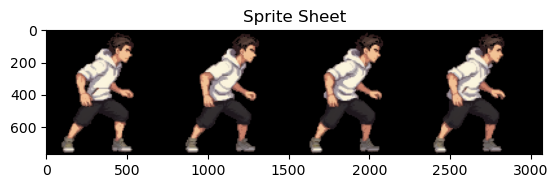

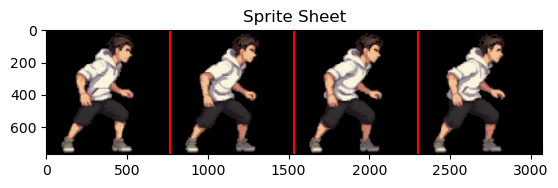

Average Difference between Frames: 6.448189629448784


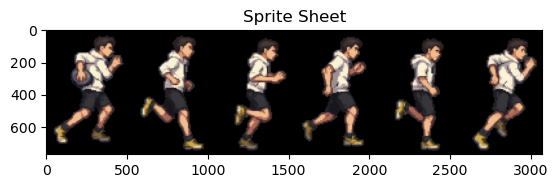

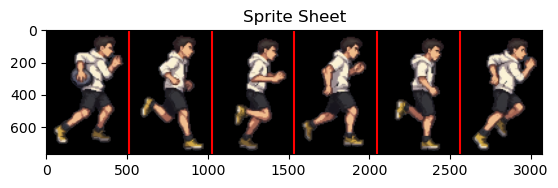

Average Difference between Frames: 26.139179484049475


In [15]:
folder_path = 'ReadyToEvaluate'

spritesheets = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(filename)
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            spritesheets.append(img)

    # Check if there are any frames to concatenate
    if not spritesheets:
        print("No frames found in the folder.")
        
for spritesheet in spritesheets:
    sprite_sheet, rows, columns = load_sprite_sheet_and_get_dimensions(spritesheet)

    if sprite_sheet is not None:
        avg_diff = process_sprite_sheet(sprite_sheet, rows, columns)
        print(f"Average Difference between Frames: {avg_diff}")

1.png


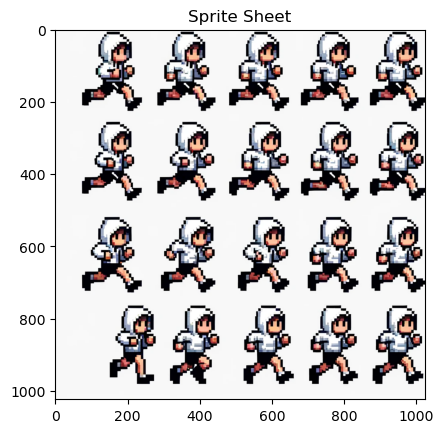

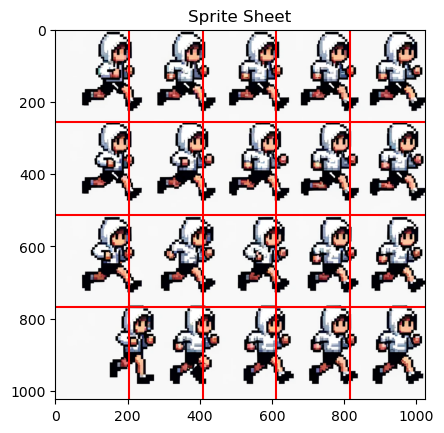

Average Difference between Frames: 45.8014586205576


In [14]:
folder_path = 'BaselineOutput'

spritesheets = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(filename)
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            spritesheets.append(img)

    # Check if there are any frames to concatenate
    if not spritesheets:
        print("No frames found in the folder.")
        
for spritesheet in spritesheets:
    sprite_sheet, rows, columns = load_sprite_sheet_and_get_dimensions(spritesheet)

    if sprite_sheet is not None:
        avg_diff = process_sprite_sheet(sprite_sheet, rows, columns)
        print(f"Average Difference between Frames: {avg_diff}")